## Fake News Project


---

### Imports

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("news.csv")

In [3]:
df.shape

(6335, 4)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [37]:
df.iloc[2]

id news                                                 3608
title            Kerry to go to Paris in gesture of sympathy
text       U.S. Secretary of State John F. Kerry said Mon...
label                                                      1
Name: 2, dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [6]:
df.rename(columns={'Unnamed: 0':'id news'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id news  6335 non-null   int64 
 1   title    6335 non-null   object
 2   text     6335 non-null   object
 3   label    6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
df.isnull().sum()

id news    0
title      0
text       0
label      0
dtype: int64

In [9]:
df.groupby('label').label.count()

label
FAKE    3164
REAL    3171
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

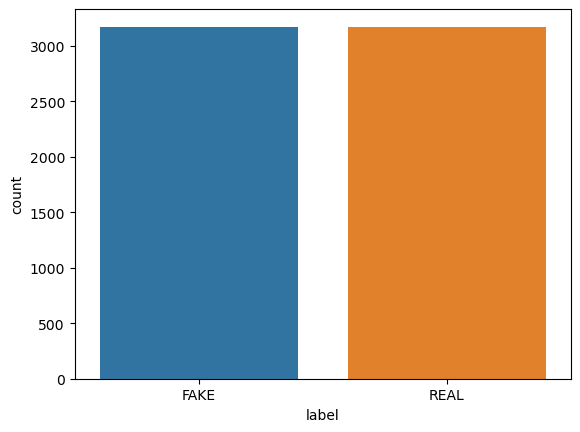

In [10]:
sns.countplot(df, x=df['label'])

**There is no class imbalance**

In [11]:
df['label']= pd.get_dummies(df['label'], drop_first=True)

In [35]:
df['label']

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: uint8

## Train/Test Split

In [12]:
X = df['text']
y = df['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [15]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [16]:
pac = PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [17]:
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [18]:
y_pred = pac.predict(tfidf_test)

In [19]:
score = accuracy_score(y_test, y_pred)

In [22]:
print(f'Accuracy: {(round(score*100,2))}%')

Accuracy: 93.76%


In [27]:
cm = confusion_matrix(y_test,y_pred)

In [36]:
cm

array([[592,  36],
       [ 43, 596]])

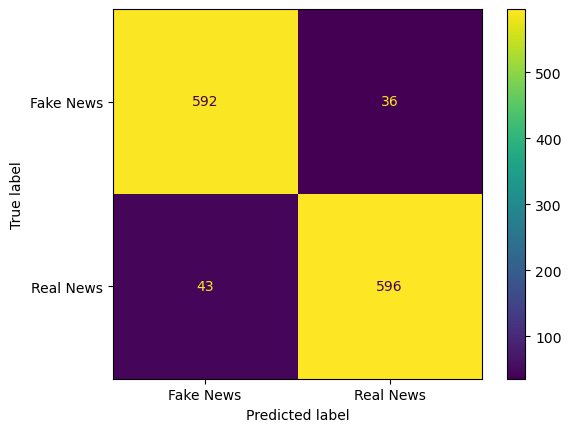

In [68]:
ConfusionMatrixDisplay(cm,display_labels=['Fake News', 'Real News']).plot()

In [63]:
example = ['Secretary of defense said that is a big probability that United States goes to war']

In [64]:
tfidf_example = tfidf_vectorizer.transform(example)

In [66]:
pac.predict(tfidf_example)

array([1], dtype=uint8)